## Sen 1 Generated

In [2]:
import h5py

train_full=h5py.File('/data/CS/Challenge/GermanAIChallenge2018/training.h5','r')
valid_full=h5py.File('/data/CS/Challenge/GermanAIChallenge2018/validation.h5','r')
test_full=h5py.File('/data/CS/Challenge/GermanAIChallenge2018/round1_test_a_20181109.h5','r')

print(train_full.keys())
print(valid_full.keys())
print(test_full.keys())

<KeysViewHDF5 ['label', 'sen1', 'sen2']>
<KeysViewHDF5 ['label', 'sen1', 'sen2']>
<KeysViewHDF5 ['sen1', 'sen2']>


In [3]:
import numpy as np

train_s1=train_full['sen1']
valid_s1=valid_full['sen1']
test_s1=test_full['sen1']

print(train_s1.shape)
print(valid_s1.shape)
print(test_s1.shape)

(352366, 32, 32, 8)
(24119, 32, 32, 8)
(4838, 32, 32, 8)


In [4]:
np.save('/data/DW/Challenge/GermanAIChallenge2018/train_s1.npy',train_s1)
np.save('/data/DW/Challenge/GermanAIChallenge2018/valid_s1.npy',valid_s1)
np.save('/data/DW/Challenge/GermanAIChallenge2018/testa_s1.npy',test_s1)

print('Data Saving Finished!')

Data Saving Finished!


### Data Analysis

In [1]:
import numpy as np

#train_s1=np.load('/data/DW/Challenge/GermanAIChallenge2018/train_s1.npy')
#train_s2=np.load('/data/DW/Challenge/GermanAIChallenge2018/train_s2.npy')
#train_y=np.load('/data/DW/Challenge/GermanAIChallenge2018/train_y.npy')

valid_s1=np.load('/data/DW/Challenge/GermanAIChallenge2018/valid_s1.npy')
#valid_s2=np.load('/data/DW/Challenge/GermanAIChallenge2018/valid_s2.npy')
#valid_y=np.load('/data/DW/Challenge/GermanAIChallenge2018/valid_y.npy')

#test_s1=np.load('/data/DW/Challenge/GermanAIChallenge2018/preda_s1_new_lg.npy')
#test_s2=np.load('/data/DW/Challenge/GermanAIChallenge2018/preda_s2_new_lg.npy')

print(valid_s1.shape)
#print(test_s2.shape)

(24119, 32, 32, 8)


In [2]:
print(np.tile(test_s1,[4,1,1,1]).shape)

(19352, 32, 32, 4)


### explaination of each LCZ category

In [ ]:
lcz_cls={
    1:'compact h',
    2:'compact m',
    3:'compact l',
    4:'open h',
    5:'open m',
    6:'open l',
    7:'light l',
    8:'large l',
    9:'sparsly built',
    10:'heavy',
    11:'dense tree',
    12:'scatter tree',
    13:'bush',
    14:'low plants',
    15:'bare rock',
    16:'bare soil',
    17:'water'
}

LCZ
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/1095279379621/1544808342147_LHBm0UhVeL.jpg)
Sentinel-1
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/1095279379621/1544804056810_YrRmE4qUZN.jpg)
Sentinel-2
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/1095279379621/1544803926711_vu51nHSnGR.jpg)

In [93]:
cls_lists=[[] for i in range(17)]
for id,i in enumerate(valid_y):
    cls_lists[i].append(id)
print(len(cls_lists))

cls_lists_5k=[[] for i in range(17)]
for id,i in enumerate(valid_y[:5000]):
    cls_lists_5k[i].append(id)
print(len(cls_lists_5k))

17
17


In [20]:
print(test_s2.shape)

(4838, 32, 32, 10)


### Distribution of values

#### Trainset

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


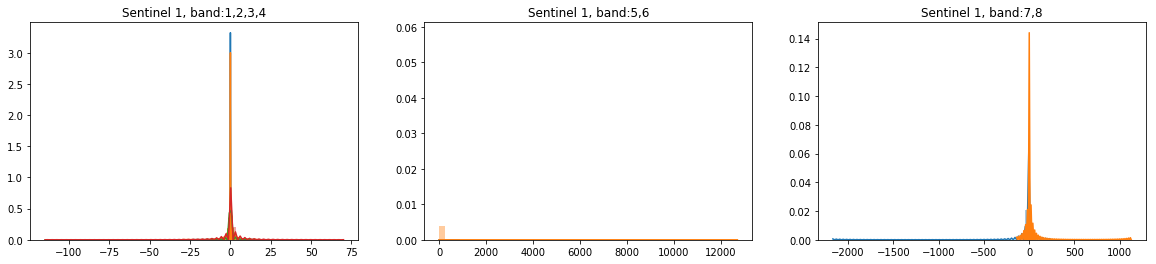

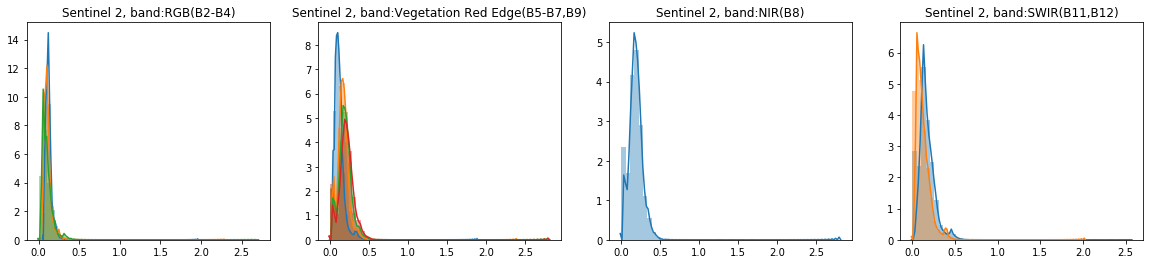

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
  
fig1, axs = plt.subplots(1,3, figsize=(20,4))
#plt.subplot(2,3,1)
for iband in range(0,4):
    sns.distplot(train_s1[...,iband].flatten()[:3600000], ax = axs[0])
axs[0].set_title('Sentinel 1, band:1,2,3,4')

for iband in range(4,6):
    sns.distplot(train_s1[...,iband].flatten()[:3600000], ax = axs[1])
axs[1].set_title('Sentinel 1, band:5,6')

for iband in range(6,8):
    sns.distplot(train_s1[...,iband].flatten()[:3600000], ax = axs[2])
axs[2].set_title('Sentinel 1, band:7,8')

plt.show()

fig2, axs = plt.subplots(1,4, figsize=(20,4))
for iband in range(0,3):
    sns.distplot(train_s2[...,iband].flatten()[:3600000], ax = axs[0])
axs[0].set_title('Sentinel 2, band:RGB(B2-B4)')

for iband in range(3,8):
    if iband==6:
        continue
    else:
        sns.distplot(train_s2[...,iband].flatten()[:3600000], ax = axs[1])
axs[1].set_title('Sentinel 2, band:Vegetation Red Edge(B5-B7,B9)')


sns.distplot(train_s2[...,6].flatten()[:3600000], ax = axs[2])
axs[2].set_title('Sentinel 2, band:NIR(B8)')

for iband in range(8,10):
    sns.distplot(train_s2[...,iband].flatten()[:3600000], ax = axs[3])
axs[3].set_title('Sentinel 2, band:SWIR(B11,B12)')

plt.show()

#### Valid set

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


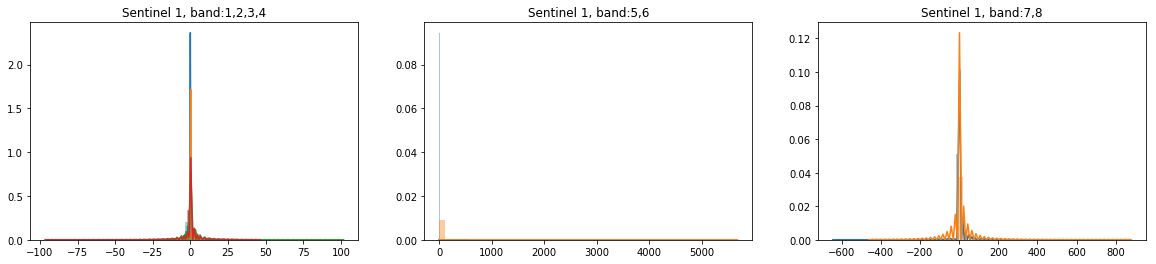

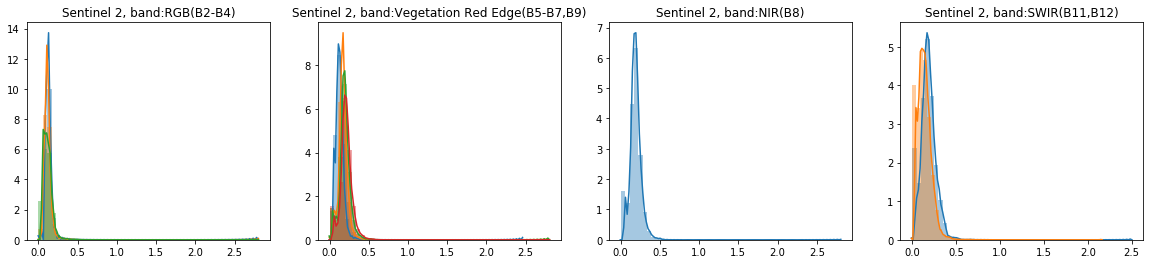

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
  
fig1, axs = plt.subplots(1,3, figsize=(20,4))
#plt.subplot(2,3,1)
for iband in range(0,4):
    sns.distplot(valid_s1[...,iband].flatten(), ax = axs[0])
axs[0].set_title('Sentinel 1, band:1,2,3,4')

for iband in range(4,6):
    sns.distplot(valid_s1[...,iband].flatten(), ax = axs[1])
axs[1].set_title('Sentinel 1, band:5,6')

for iband in range(6,8):
    sns.distplot(valid_s1[...,iband].flatten(), ax = axs[2])
axs[2].set_title('Sentinel 1, band:7,8')

plt.show()

fig2, axs = plt.subplots(1,4, figsize=(20,4))
for iband in range(0,3):
    sns.distplot(valid_s2[...,iband].flatten(), ax = axs[0])
axs[0].set_title('Sentinel 2, band:RGB(B2-B4)')

for iband in range(3,8):
    if iband==6:
        continue
    else:
        sns.distplot(valid_s2[...,iband].flatten(), ax = axs[1])
axs[1].set_title('Sentinel 2, band:Vegetation Red Edge(B5-B7,B9)')


sns.distplot(valid_s2[...,6].flatten(), ax = axs[2])
axs[2].set_title('Sentinel 2, band:NIR(B8)')

for iband in range(8,10):
    sns.distplot(valid_s2[...,iband].flatten(), ax = axs[3])
axs[3].set_title('Sentinel 2, band:SWIR(B11,B12)')

plt.show()

#### Test set

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


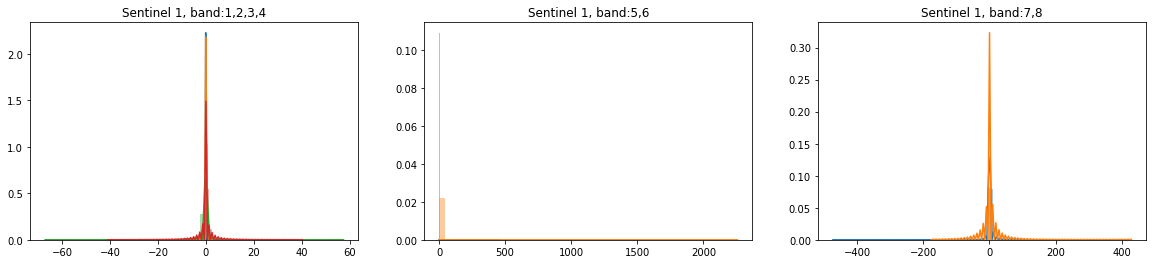

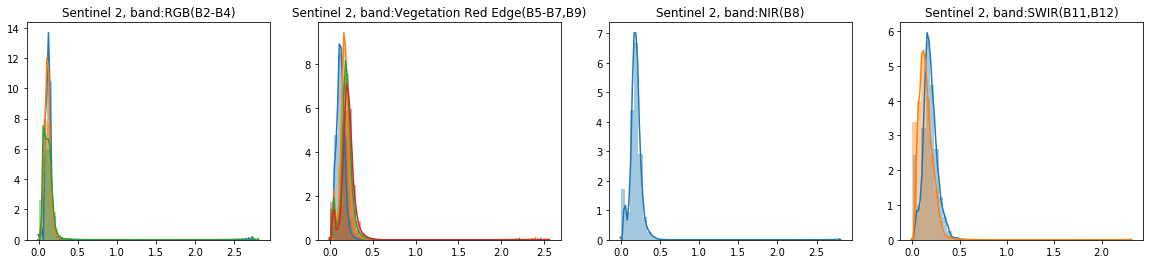

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
  
fig1, axs = plt.subplots(1,3, figsize=(20,4))
#plt.subplot(2,3,1)
for iband in range(0,4):
    sns.distplot(test_s1[...,iband].flatten(), ax = axs[0])
axs[0].set_title('Sentinel 1, band:1,2,3,4')

for iband in range(4,6):
    sns.distplot(test_s1[...,iband].flatten(), ax = axs[1])
axs[1].set_title('Sentinel 1, band:5,6')

for iband in range(6,8):
    sns.distplot(test_s1[...,iband].flatten(), ax = axs[2])
axs[2].set_title('Sentinel 1, band:7,8')

plt.show()

fig2, axs = plt.subplots(1,4, figsize=(20,4))
for iband in range(0,3):
    sns.distplot(test_s2[...,iband].flatten(), ax = axs[0])
axs[0].set_title('Sentinel 2, band:RGB(B2-B4)')

for iband in range(3,8):
    if iband==6:
        continue
    else:
        sns.distplot(test_s2[...,iband].flatten(), ax = axs[1])
axs[1].set_title('Sentinel 2, band:Vegetation Red Edge(B5-B7,B9)')


sns.distplot(test_s2[...,6].flatten(), ax = axs[2])
axs[2].set_title('Sentinel 2, band:NIR(B8)')

for iband in range(8,10):
    sns.distplot(test_s2[...,iband].flatten(), ax = axs[3])
axs[3].set_title('Sentinel 2, band:SWIR(B11,B12)')

plt.show()

#### S1 ANALYSIS

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


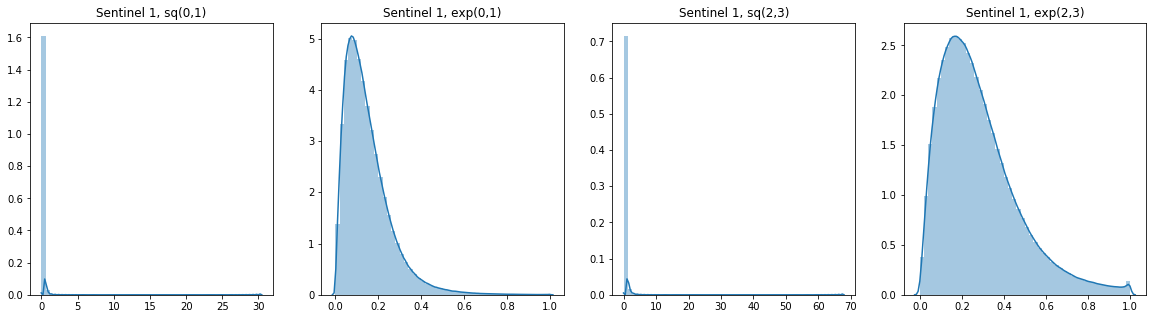

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
  
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for i0,i1 in ((0,1),(2,3)):
    data_0 = test_s1[...,i0].flatten()
    data_1 = test_s1[...,i1].flatten()
    data_norm = np.sqrt(np.square(data_0) + np.square(data_1))
    data_exp = 1-np.exp(np.negative(data_norm))#1-exp(-x)
    sns.distplot(data_norm, ax = axs[i0])
    axs[i0].set_title('Sentinel 1, sq(' + str(i0) + ',' + str(i1) + ')')
    sns.distplot(data_exp, ax = axs[i1])
    axs[i1].set_title('Sentinel 1, exp(' + str(i0) + ',' + str(i1) + ')')

plt.show()

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


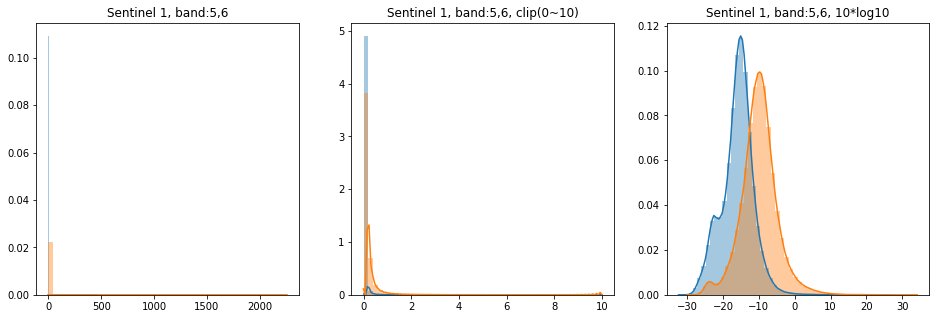

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
  
fig, axs = plt.subplots(1,3, figsize=(16,5))
for iband in range(4,6):
    data = test_s1[...,iband].flatten()
    sns.distplot(data, ax=axs[0])
    sns.distplot(np.clip(data,0,10), ax=axs[1])
    sns.distplot(10*np.log10(data), ax=axs[2])

axs[0].set_title('Sentinel 1, band:5,6')
axs[1].set_title('Sentinel 1, band:5,6, clip(0~10)')
axs[2].set_title('Sentinel 1, band:5,6, 10*log10')

plt.show()

(-0.5, 31.5, 31.5, -0.5)

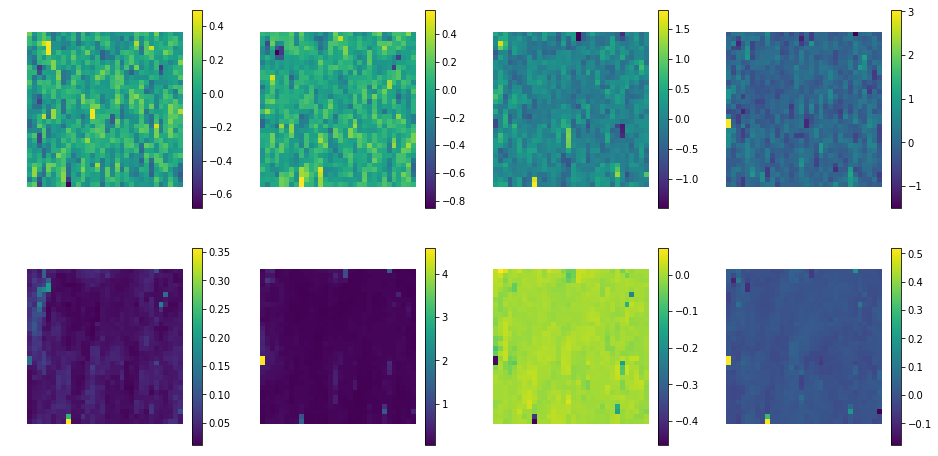

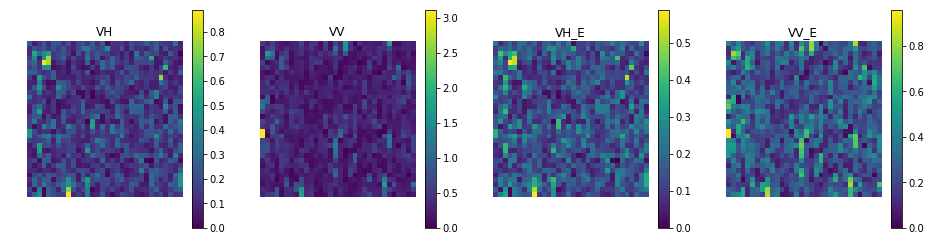

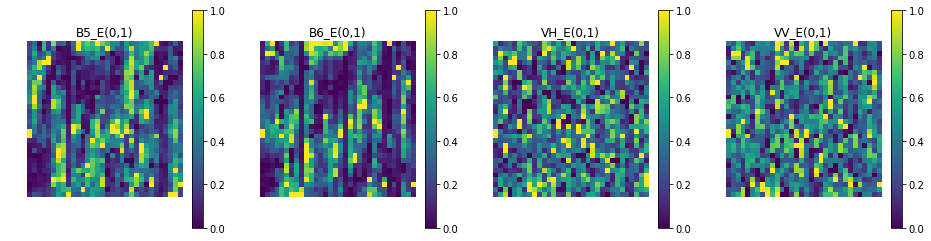

In [26]:
valid_s1=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2testb_s1.npy")

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.subplots(2,4,figsize=(16,8))

s1_data=valid_s1[0]
for i in range(2):
    for j in range(4):
        plt.subplot(2,4,4*i+j+1)
        plt.imshow(s1_data[:,:,4*i+j])
        plt.colorbar()
        plt.axis('off')
        
plt.subplots(1,2,figsize=(16,4))
VH=np.sqrt(s1_data[:,:,0]**2+s1_data[:,:,1]**2)
VV=np.sqrt(s1_data[:,:,2]**2+s1_data[:,:,3]**2)
VH_E=1-np.exp(-VH)
VV_E=1-np.exp(-VV)

plt.subplot(1,4,1)
plt.imshow(VH)
plt.colorbar()
plt.title('VH')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(VV)
plt.colorbar()
plt.title('VV')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(VH_E)
plt.colorbar()
plt.title('VH_E')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(VV_E)
plt.colorbar()
plt.title('VV_E')
plt.axis('off')

plt.subplots(1,2,figsize=(16,4))

scaler=MinMaxScaler(feature_range=(0,1))

plt.subplot(1,4,1)
plt.imshow(scaler.fit_transform(1-np.exp(-s1_data[:,:,4])))
plt.colorbar()
plt.title('B5_E(0,1)')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(scaler.fit_transform(1-np.exp(-s1_data[:,:,5])))
plt.title('B6_E(0,1)')
plt.colorbar()

plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(scaler.fit_transform(VH_E))
plt.colorbar()
plt.title('VH_E(0,1)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(scaler.fit_transform(VV_E))
plt.colorbar()
plt.title('VV_E(0,1)')
plt.axis('off')

Text(0.5, 1.0, 'NDVI')

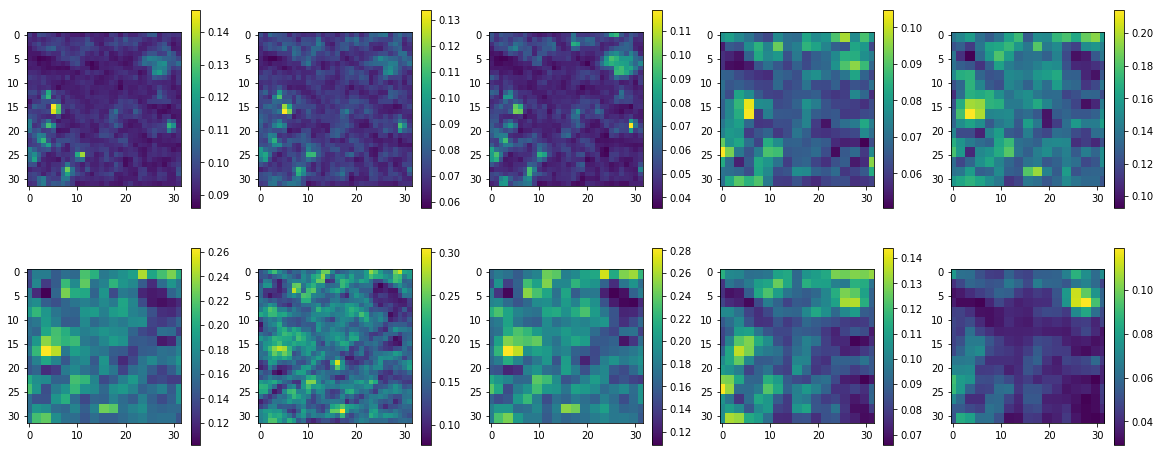

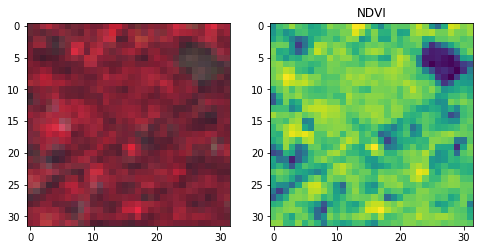

In [33]:
valid_s2=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2testb_s2.npy")

import matplotlib.pyplot as plt

s2_data=valid_s2[0]

plt.subplots(2,5,figsize=(20,8))

for i in range(2):
    for j in range(5):
        plt.subplot(2,5,5*i+j+1)
        plt.imshow(s2_data[:,:,5*i+j])
        plt.colorbar()
plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(s2_data[:,:,[6,2,1]].astype('float32')*3)

plt.subplot(1,2,2)
plt.imshow((s2_data[:,:,6]-s2_data[:,:,2])/(s2_data[:,:,6]+s2_data[:,:,2])*0.5+0.5)
plt.title('NDVI')

Text(0.5, 1.0, 'S2 PC2')

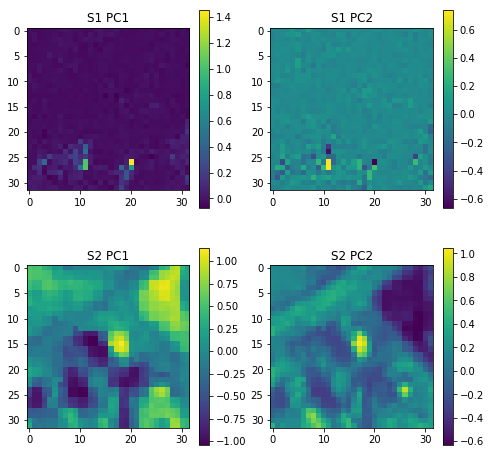

In [104]:
s1_data=s1_data.reshape(32*32,8)
s2_data=s2_data.reshape(32*32,10)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

s1_pca=scaler.fit_transform(s1_data)
s2_pca=scaler.fit_transform(s2_data)

pca_model=PCA(n_components=2)
s11_pca=pca_model.fit_transform(s1_pca)[:,0].reshape(32,32)
s12_pca=pca_model.fit_transform(s1_pca)[:,1].reshape(32,32)
s21_pca=pca_model.fit_transform(s2_pca)[:,0].reshape(32,32)
s22_pca=pca_model.fit_transform(s2_pca)[:,1].reshape(32,32)

plt.subplots(16,8,figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(s11_pca)
plt.colorbar()
plt.title('S1 PC1')

plt.subplot(2,2,2)
plt.imshow(s12_pca)
plt.colorbar()
plt.title('S1 PC2')

plt.subplot(2,2,3)
plt.imshow(s21_pca)
plt.colorbar()
plt.title('S2 PC1')

plt.subplot(2,2,4)
plt.imshow(s22_pca)
plt.colorbar()
plt.title('S2 PC2')

New Dataset

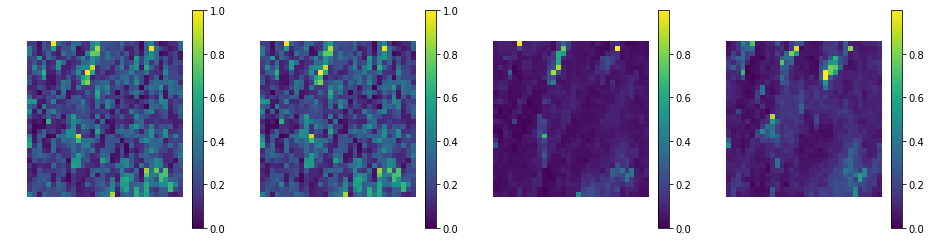

In [22]:
s1_data=test_s1[99]
plt.subplots(1,4,figsize=(16,4))
for i in range(1):
    for j in range(4):
        plt.subplot(1,4,4*i+j+1)
        plt.imshow(s1_data[:,:,4*i+j])
        plt.colorbar()
        plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


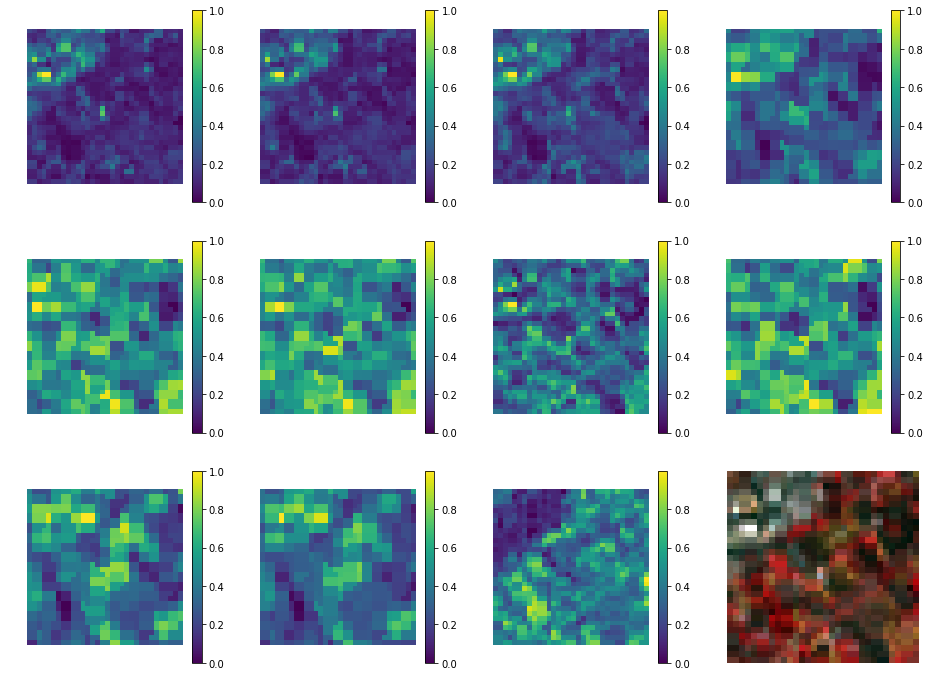

In [27]:
s2_data=test_s2[99]
plt.subplots(3,4,figsize=(16,12))
for i in range(3):
    for j in range(4):
        plt.subplot(3,4,4*i+j+1)
        if i==2 and j==3:
            plt.imshow(s2_data[:,:,[6,2,1]])
        else:
            plt.imshow(s2_data[:,:,4*i+j])
            plt.colorbar()
        plt.axis('off')

###Log

In [ ]:
test_s1

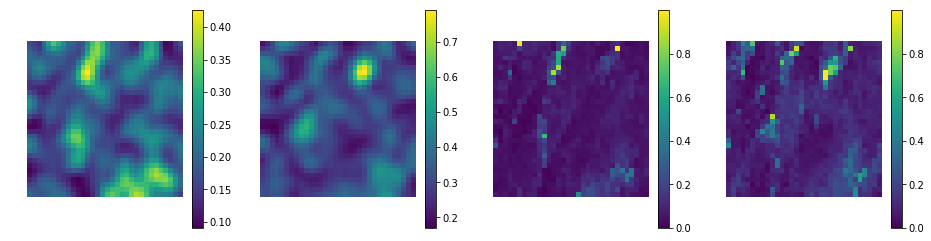

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

s1_data=test_s1[99]
plt.subplots(1,4,figsize=(16,4))
for i in range(1):
    for j in range(4):
        plt.subplot(1,4,4*i+j+1)
        plt.imshow(s1_data[:,:,4*i+j])
        plt.colorbar()
        plt.axis('off')

In [8]:
print(test_s1[100,:,:,0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### DeHaza

In [1]:
import numpy as np
valid_s2=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2testb_s2.npy")

In [2]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

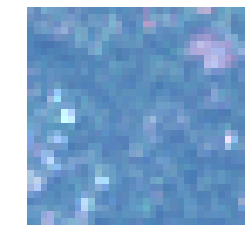

In [12]:
s2_data=valid_s2[0]

plt.imshow(s2_data[:,:,[2,1,0]]*8)

plt.axis('off')

In [6]:
import cv2  
import numpy as np  
   
def zmMinFilterGray(src, r=5):  
    '''''最小值滤波，r是滤波器半径'''  
    return cv2.erode(src,np.ones((2*r-1,2*r-1)))
# =============================================================================
#     if r <= 0:  
#         return src  
#     h, w = src.shape[:2]  
#     I = src  
#     res = np.minimum(I  , I[[0]+range(h-1)  , :])  
#     res = np.minimum(res, I[range(1,h)+[h-1], :])  
#     I = res  
#     res = np.minimum(I  , I[:, [0]+range(w-1)])  
#     res = np.minimum(res, I[:, range(1,w)+[w-1]])  
# =============================================================================
 #   return zmMinFilterGray(res, r-1)  
    
def guidedfilter(I, p, r, eps):  
    '''''引导滤波，直接参考网上的matlab代码'''  
    height, width = I.shape  
    m_I = cv2.boxFilter(I, -1, (r,r))  
    m_p = cv2.boxFilter(p, -1, (r,r))  
    m_Ip = cv2.boxFilter(I*p, -1, (r,r))  
    cov_Ip = m_Ip-m_I*m_p  
   
    m_II = cv2.boxFilter(I*I, -1, (r,r))  
    var_I = m_II-m_I*m_I  
   
    a = cov_Ip/(var_I+eps)  
    b = m_p-a*m_I  
   
    m_a = cv2.boxFilter(a, -1, (r,r))  
    m_b = cv2.boxFilter(b, -1, (r,r))  
    return m_a*I+m_b  
   
def getV1(m, r, eps, w, maxV1):  #输入rgb图像，值范围[0,1]  
    '''''计算大气遮罩图像V1和光照值A, V1 = 1-t/A'''  
    V1 = np.min(m,2)                                         #得到暗通道图像  
    V1 = guidedfilter(V1, zmMinFilterGray(V1,5), r, eps)     #使用引导滤波优化  
    bins = 2000  
    ht = np.histogram(V1, bins)                              #计算大气光照A  
    d = np.cumsum(ht[0])/float(V1.size)  
    for lmax in range(bins-1, 0, -1):  
        if d[lmax]<=0.999:  
            break  
    A  = np.mean(m,2)[V1>=ht[1][lmax]].max()  
           
    V1 = np.minimum(V1*w, maxV1)                   #对值范围进行限制  
       
    return V1,A  
   
def deHaze(m, r=11, eps=0.001, w=0.95, maxV1=0.80, bGamma=False):  
    Y = np.zeros(m.shape)  
    V1,A = getV1(m, r, eps, w, maxV1)               #得到遮罩图像和大气光照  
    for k in range(m.shape[2]):  
        Y[:,:,k] = (m[:,:,k]-V1)/(1-V1/A)           #颜色校正  
    #Y =  np.clip(Y, 0, 1)  
    if bGamma:  
        Y = Y**(np.log(0.5)/np.log(Y.mean()))       #gamma校正,默认不进行该操作  
    return Y  
   

In [7]:
m = deHaze(s2_data[:,:,:],r=3)
n = deHaze(s2_data[:,:,:],r=9)

(32, 32, 3)


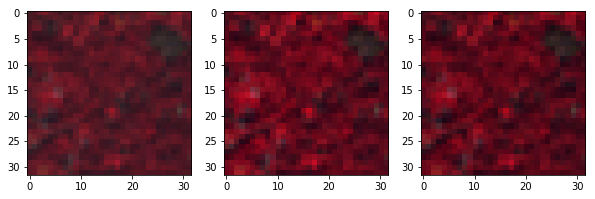

In [8]:
plt.figure(4,figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(s2_data[:,:,[6,2,1]]*2)
plt.subplot(1,3,2)
plt.imshow(m[:,:,[6,2,1]]*2)
plt.subplot(1,3,3)
plt.imshow(n[:,:,[6,2,1]]*2)
print(n[:,:,[6,2,1]].shape)

In [9]:
m1 = deHaze(s2_data[:,:,[0,1,2]])
m2=np.concatenate([m1,s2_data[:,:,3:]],axis=2)

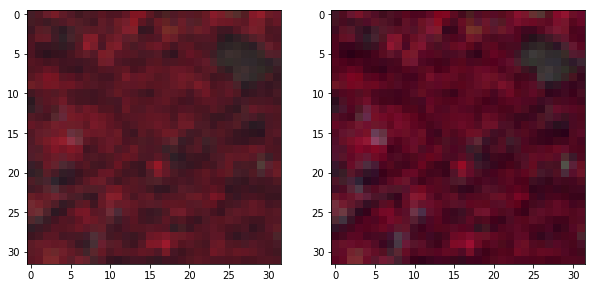

In [10]:
plt.figure(4,figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(s2_data[:,:,[6,2,1]]*2)
plt.subplot(1,2,2)
plt.imshow(m2[:,:,[6,2,1]]*2)

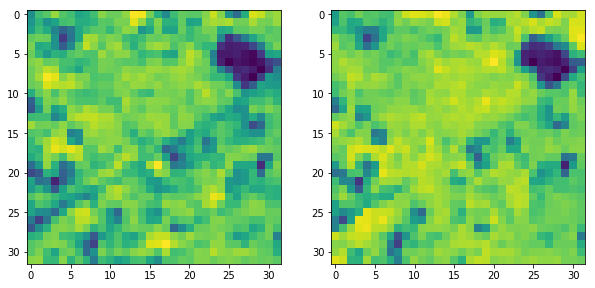

In [11]:
A=(s2_data[:,:,6]-s2_data[:,:,2])/(s2_data[:,:,6]+s2_data[:,:,2])
B=(m[:,:,6]-m[:,:,2])/(m[:,:,6]+m[:,:,2])

plt.figure(5,figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(A)
plt.subplot(1,2,2)
plt.imshow(B)

### Gau+haze & no Gau+haze & no Gau+Dehaze

In [82]:
gau=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2tesa_s2_new_gau.npy")
nogau=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2tesa_s2_new_haze.npy")
haze=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2tesa_s2_new.npy")

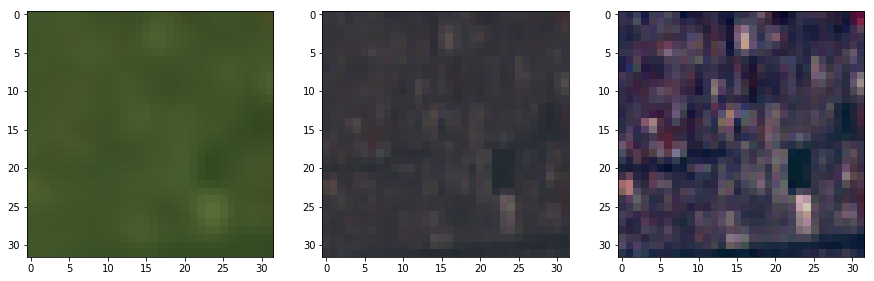

In [120]:
plt.figure(5,figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow((gau[1][:,:,[2,1,0]]+1)*2)
plt.subplot(1,3,2)
plt.imshow((nogau[1][:,:,[2,1,0]]+1)*2)
plt.subplot(1,3,3)
plt.imshow(haze[1][:,:,[2,1,0]]+1)

In [23]:
s1=np.load("/data/DW/Challenge/GermanAIChallenge2018/Round_2/R2tesb_s1_new.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


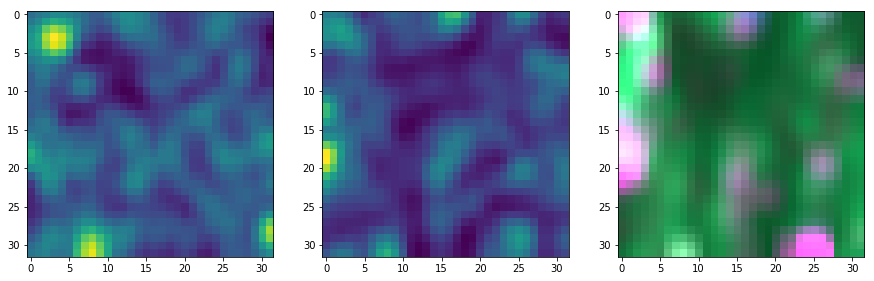

In [24]:
plt.figure(6,figsize=(15,9))

plt.subplot(1,3,1)
plt.imshow((s1[0][:,:,0]+1)*2)
plt.subplot(1,3,2)
plt.imshow((s1[0][:,:,1]+1)*2)
plt.subplot(1,3,3)
plt.imshow((s1[0][:,:,[2,3,4]]+1)*10)